<a href="https://colab.research.google.com/github/roenseed/python-save-script/blob/main/Trading_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Settrade SDK** <br>
ถ้ารันบน Colab ต้องรันใหม่ทุกครั้ง แต่ถ้าลงบนเครื่องผ่าน cmd ทำแค่ทีเดียว

In [ ]:
!pip install settrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95.6 MB 44 kB/s 
  Created wheel for settrade: filename=settrade-0.5.0-py3-none-any.whl size=5058070 sha256=5695e453181757ffcc4db52f299d55aa1d6723fc93aed55a17179c1263a93850
  Stored in directory: /root/.cache/pip/wheels/1d/c9/b8/b82bf42b1de56957a7916cecd1416a65350900cc3967401177
Successfully built settrade


**Import Library and Setup Account** <br>
นำข้อมูล Account ของตัวเองมาใส่เพื่อให้ API สามารถใช้งานได้ <br>
แล้วทำการ setting ตัวแทนการใช้งานโดย <br>

1.  deri จะใช้แทนการเรียก derivative account
2.  equity จะใช้แทนการเรียก equity account
3.  market จะใช้แทนการเรียก market data



In [ ]:
import settrade.openapi
from settrade.openapi import Investor
import pandas as pd
import datetime

investor = Investor(
    app_id="bLtvsMNJAVh5bWA1",  # Your app ID
    app_secret="AI+i3v2PoiTpF7XAT2Uo2T6OMObbxkjwvT27HyY79uTT",  # Your app Secret
    broker_id="SANDBOX",
    app_code="SANDBOX",
    is_auto_queue=True,
)


deri = investor.Derivatives(account_no="Finnize-D")  # Your account number
equity = investor.Equity(account_no="Finnize-E")
market = investor.MarketData()

**Get data from derivative account info** <br>
วิธีการดึง data มาดู

In [ ]:
deri_account_info = deri.get_account_info()

deri_account_info

{'success': True,
 'status_code': 200,
 'data': {'call_force_flag': 'No',
  'call_force_margin': 0.0,
  'cash_balance': 100000000.0,
  'credit_line': 99895000.0,
  'equity': 100000000.0,
  'excess_equity': 99895000.0,
  'total_mm': 105000.0,
  'total_mr': 105000.0},
 'message': ''}

**Get data from equity account info**

In [ ]:
equity_account_info = equity.get_account_info()
equity_account_info

{'success': True,
 'status_code': 200,
 'data': {'account_type': 'CASH_ACCOUNT',
  'additional_data': 0.0,
  'can_buy': True,
  'can_sell': True,
  'cash_balance': 10000000.0,
  'client_type': 'INDIVIDUAL',
  'credit_balance': False,
  'credit_limit': 10000000.0,
  'customer_type': 'CUSTOMER',
  'initial_cash_balance': 10000000.0,
  'initial_credit_limit': 10000000.0,
  'initial_line_available': 10000000.0,
  'line_available': 9389435.0,
  'net_settlement_line': 0.0},
 'message': ''}

In [ ]:
print('Line available is' , equity_account_info['data']['line_available'])

Line available is 9389435.0


**Place order** <br>
การส่งคำสั่งเข้าตลาด และดึง order no มาเก็บไว้


In [ ]:
place_order = deri.place_order(
    symbol="GOZ22",
    price=1900,
    volume=1,
    side="LONG",
    position="OPEN",
    pin="000000")

place_order

{'success': False,
 'status_code': 400,
 'data': {},
 'message': '{"message":"O001: Not allow to trade during this time","code":"GWD-01"}'}

ตลาด TFEX order no จะเป็นตัวเลข

In [ ]:
order_no = place_order['data']['order_no']
print('Order no is' , order_no)

Order no is 98215


In [ ]:
place_order = equity.place_order(
    symbol="AOT",
    price=70,
    volume=100,
    side="BUY",
    pin="000000",
    bypass_warning = True)

place_order

{'success': True,
 'status_code': 200,
 'data': {'order_no': '2YEGCQL8IP'},
 'message': ''}

ตลาด หุ้น order no จะเป็น string หรือตัวอักษร

In [ ]:
order_no = place_order['data']['order_no']
print('Order no is' , order_no)

Order no is 2YECJMASF5


**Cancel order** <br>
วิธีการยกเลิกคำสั่งซื้อขายที่ส่งไปแล้วแต่ยังไม่ matched

In [ ]:
cancel_order = equity.cancel_order(order_no="2YE2IEQC6X", pin="000000")

cancel_order

{'success': False,
 'status_code': 400,
 'data': {},
 'message': '{"message":"Invalid Order state","code":"SEOSGW-01"}'}

**Get Market Data** <br>
การดึงข้อมูลย้อน historical data ถ้าใช้ใน SANDBOX ข้อมูลจะไม่ตรงกับของจริง <br>
ส่วนการดึงข้อมูล realtime ไม่สามารถใช้บน Colab ได้

In [ ]:
ChartDataResponse = market.get_candlestick("GOZ22","1d",10,"2022-09-16T00:00:00","2023-01-01T00:00:00",True)
hist_data = pd.DataFrame(ChartDataResponse['data'])
hist_data['time'] = pd.to_datetime(hist_data['time'],unit='s')
hist_data

,last_sequence,time,open,high,low,close,volume
0,0,2022-09-15 17:00:00,1710.5,1715.9,1677.5,1683.0,24175
1,0,2022-09-18 17:00:00,1688.3,1702.8,1681.1,1685.8,18778
2,0,2022-09-19 17:00:00,1684.1,1699.4,1683.9,1689.0,9383
3,0,2022-09-20 17:00:00,1689.8,1696.1,1682.5,1695.9,10789
4,0,2022-09-21 17:00:00,1696.7,1710.0,1676.1,1690.5,29726
5,0,2022-09-22 17:00:00,1690.9,1706.1,1674.3,1676.5,24641
6,0,2022-09-25 17:00:00,1670.0,1679.8,1657.0,1664.7,24828
7,0,2022-09-26 17:00:00,1662.2,1669.9,1645.0,1655.1,24837
8,0,2022-09-27 17:00:00,1662.3,1662.5,1637.2,1639.0,29605
9,0,2022-09-28 17:00:00,1645.3,1680.8,1644.7,1669.3,54433


**Build Strategy** <br>
วิธีการสร้าง strategy และ screening หุ้น ด้วย library ezyquant


In [ ]:
!pip install ezyquant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import ezyquant as ez
from ezyquant.backtesting import Context
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

model_name = "Template"

# Connect Database
from google.colab import drive

drive.mount("/content/drive")
database_path = "/content/drive/MyDrive/DB/ezyquant.db"
ez.connect_sqlite(database_path)

# Pull Data
start_date = "2018-01-01"
end_date = "2022-05-30"
ssc = ez.SETSignalCreator(
    start_date=start_date,
    end_date=end_date,
    index_list=[],
    symbol_list=["COM7", "HANA", "EA", "GULF", "PTTEP", "KTB"],
)

# Create Signal
df_close = ssc.get_data("close", "daily")
ema20 = ssc.ta.ema(df_close, 20)
ema100 = ssc.ta.ema(df_close, 100)
signal_df = ema20 > ema100

# Backtest Algorithm
def backtest_algorithm(c: Context):
    if c.symbol == "AOT":
        print("----------------------" + str(c.ts) + "------------------")

    adj_volume = 100 * round(c.target_pct_port(0.2) / 100, 0)
    sell_volume = 100 * round(c.target_pct_port(0) / 100, 0)

    if c.signal == True:
        return c.target_pct_port(0.25)
    else:
        return c.target_pct_port(0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
result = ez.backtest(
    signal_df=signal_df,
    backtest_algorithm=backtest_algorithm,
    start_date=start_date,
    end_date=end_date,
    initial_cash=1e6,
    pct_commission=0.25,
    pct_buy_slip=0.0,
    pct_sell_slip=0.0,
    price_match_mode="weighted",
    signal_delay_bar=1,
)

CAGR:14.62%
MaxDD:-25.94%
Win rate:84.82%


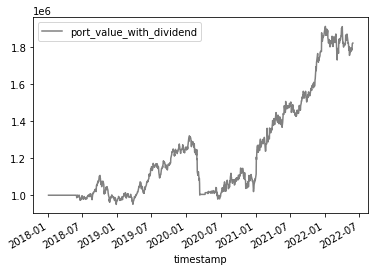

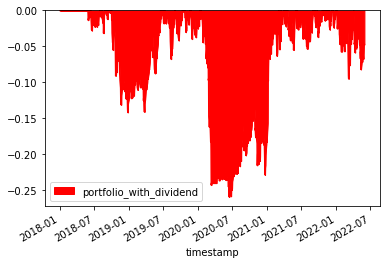

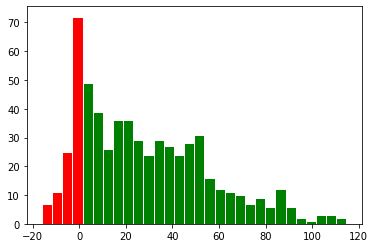

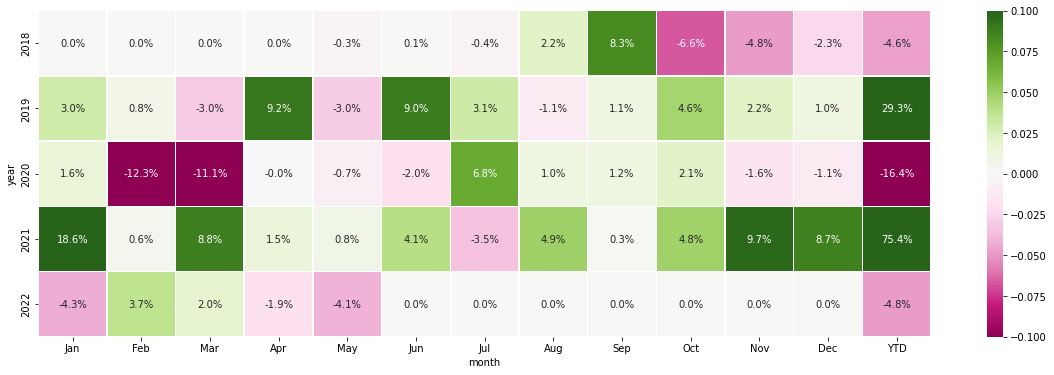

In [ ]:
# Show Result

print("CAGR:" + str(round(result.cagr["portfolio_with_dividend"] * 100, 2)) + "%")
result.summary_df.plot.line(x="timestamp", y="port_value_with_dividend", color="grey")
print(
    "MaxDD:"
    + str(round(result.pct_maximum_drawdown["portfolio_with_dividend"] * 100, 2))
    + "%"
)
result.drawdown_percent_df.plot.area(y="portfolio_with_dividend", color="red")
print("Win rate:" + str(round(result.pct_win_per_trade * 100, 2)) + "%")
fig, ax = plt.subplots()
N, bins, patches = ax.hist(
    result.summary_trade_df["pct_return"] * 100, edgecolor="white", linewidth=1, bins=30
)

for i in range(0, len(patches)):
    if patches[i].xy[0] <= 0:
        patches[i].set_facecolor("red")
    else:
        patches[i].set_facecolor("green")

return_table = (result.monthly_return_df.loc["portfolio"]).replace(np.nan, 0)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(
    return_table,
    annot=True,
    fmt=".1%",
    linewidths=0.5,
    ax=ax,
    cmap="PiYG",
    vmin=-0.1,
    vmax=0.1,
)

**Screening and Execute Orders** <br>
การกรองหุ้นตาม strategy ในแต่ละวันและส่งคำสั่งซื้อขายเข้าตลาดหลักทรัพย์

In [ ]:
# Show Signal
signal_df

,COM7,EA,GULF,HANA,KTB,PTTEP
2018-01-03,False,False,False,False,False,False
2018-01-04,False,False,False,False,False,False
2018-01-05,False,False,False,False,False,False
2018-01-08,False,False,False,False,False,False
2018-01-09,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-05-24,False,False,False,False,True,True
2022-05-25,False,False,False,False,True,True
2022-05-26,False,False,False,False,True,True
2022-05-27,False,False,False,False,True,True


In [ ]:
# Screen Stock that pass condition
buy_signal = signal_df.iloc[-1][signal_df.iloc[-1]].index.tolist()
buy_signal

['KTB', 'PTTEP']

In [ ]:
equity_account_info = equity.get_account_info()
equity_portfolio = equity.get_portfolio()
current_symbol_port = [i["symbol"] for i in equity_portfolio["data"]]
cash = equity_account_info["data"]["cash_balance"]
market_value = sum(i["market_value"] for i in equity_portfolio["data"])
port_value = cash + market_value

# Buy 5% port value if symbol not in portfolio
for s in buy_signal:
    if s not in current_symbol_port:
        price = [i["market_price"] for i in equity_portfolio["data"] if i["symbol"]==s][0]
        volume = int((port_value * 0.05 / price) // 100 * 100)
        print("buy: ", s, "@",price, " for ",volume)
        place_order = equity.place_order(
            symbol=s,
            price=price,
            volume=volume,
            side="BUY",
            pin="000000",
        )
        print(place_order)

# Sell no signal stock
for s in current_symbol_port:
    if s not in buy_signal:
        price = [i["market_price"] for i in equity_portfolio["data"] if i["symbol"]==s][0]
        volume = [i["current_volume"] for i in equity_portfolio["data"] if i["symbol"]==s][0]
        volume = int((volume) // 100 * 100)
        print("sell: ", s, "@",price, " for ",volume)
        place_order = equity.place_order(
            symbol=s,
            price=price,
            volume=volume,
            side="SELL",
            pin="000000",
        )
        print(place_order)

sell:  AOT @ 72.25  for  100
{'success': True, 'status_code': 200, 'data': {'order_no': '2YEGFJFJ3T'}, 'message': ''}
sell:  SIRI @ 0.95  for  1000
{'success': True, 'status_code': 200, 'data': {'order_no': '2YEGFK1R9D'}, 'message': ''}
